In [135]:
import pandas as pd
import sys
sys.path.append('./slidescore/')
from slidescore_utils import APIClient
import os
import json
import numpy as np
import PIL
from sklearn import metrics
import matplotlib.pyplot as plt


In [145]:
df_h = pd.read_csv('/project/schirris/basisscripts/step_4/basis_slidescore_answers_summary.csv')
all_labels = pd.read_csv('/project/schirris/basisscripts/step_3/data_basis_brca_with_labels.csv').groupby('case').mean()
df_ai = pd.read_csv('/home/yonis/SimCLR-1/logs/eval/1342/regression_output_epoch_20_2020-10-09-16-24-40.csv').set_index('patient')
im_path = '/home/yonis/SimCLR-1/logs/eval/1342/roc_curve_epoch_20.png'

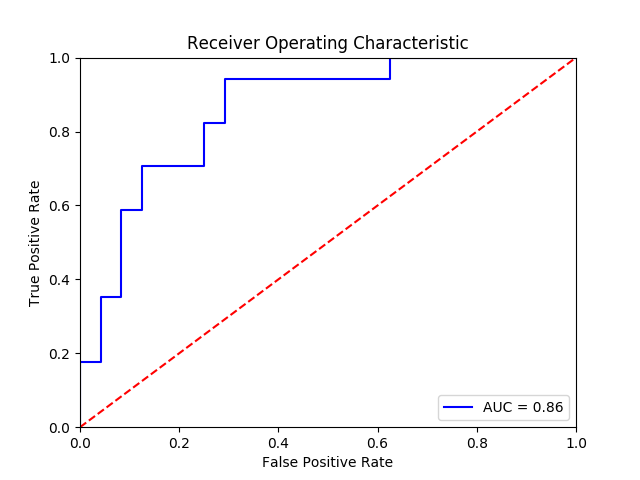

In [146]:
display(Image.open(im_path))

In [147]:
df_h['patient']=df_h.apply(lambda x: x['path'].split('/')[-1].split('_')[1].split('-')[0], axis=1)
# df_h['WSI']=df.apply(lambda x: x['path'].split('/')[-1][7:-5], axis=1)
# df_h['label'] = df.apply(lambda x: all_labels.loc[x['WSI'], 'HRD'], axis=1)
# df_h['label'] = df_h.apply(lambda x: all_labels.loc[x['patient'], 'median_HRD'], axis=1)


In [156]:
# df_h_test = df_h[df_h['patient'].isin(df_ai.index)]
df_h_test = df_h[df_h['patient'].isin(all_labels.index)]
df_h_test = df_h_test[df_h_test['hrd'].isin(['No', 'Yes'])]

In [157]:
len(df_h_test)

224

In [158]:
df_h_test['h_label'] = df_h_test.apply(lambda x: 1 if x['hrd'] == "Yes" else 0, axis=1)
df_h_test['real_label'] = df_h_test.apply(lambda x: all_labels.at[x['patient'], 'median_HRD'], axis=1)
df_h_test['correct'] = df_h_test.apply(lambda x: x['h_label']==x['real_label'], axis=1)
# df_h_test['ai_label'] = df_h_test.apply(lambda x: df_ai.at[x['patient'], 'preds'], axis=1)

In [169]:
# ai_pred = df_h_test['ai_label']
h_pred = df_h_test['h_label']

label=df_h_test['real_label']

h_pred=h_pred[~label.isna()]
label = label.dropna()
print(label.unique())

h_rocauc = metrics.roc_auc_score(y_true=label, y_score=h_pred)
# ai_rocauc = metrics.roc_auc_score(y_true=label, y_score=ai_pred)

[1. 0.]


[]

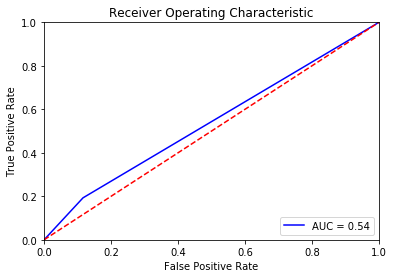

In [170]:
fpr, tpr, threshold = metrics.roc_curve(label, h_pred)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % h_rocauc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.plot()

[]

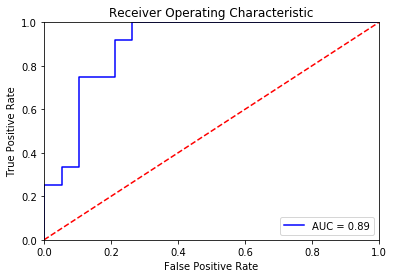

In [140]:
fpr, tpr, threshold = metrics.roc_curve(label, ai_pred)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % ai_rocauc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.plot()